In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
telecom_data = pd.read_csv("telecom.csv")
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telecom_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
telecom_data.shape

(7043, 21)

In [5]:
telecom_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
telecom_data['Churn'] = telecom_data[['Churn']].replace({'Yes':'Churn','No':'Not Churned'})

####
 Dividing Payment methods into two categories - Automatic or Manual

This could be a good feature for our model.

Visualizing the correlation of certain features which may effect customer churn.

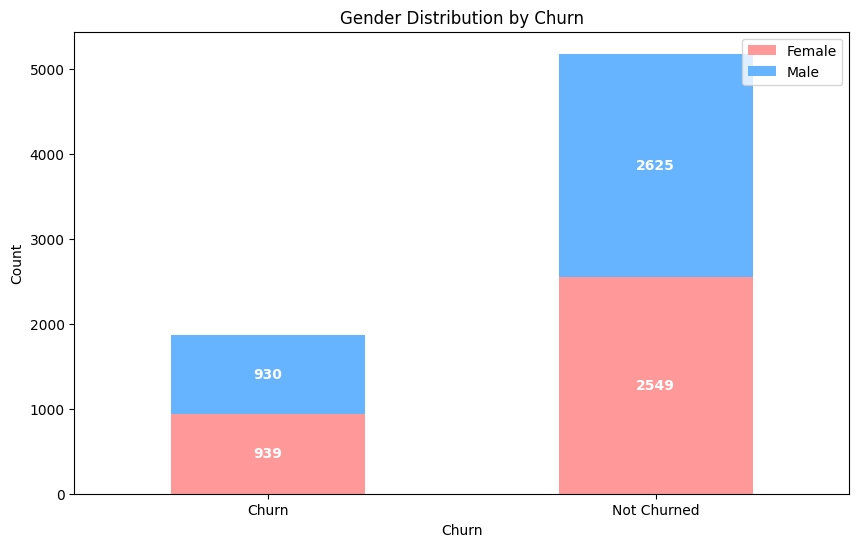

In [7]:
gender_churn_counts = telecom_data.groupby(['Churn','gender']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#ff9999', '#66b3ff']


bars = gender_churn_counts.plot(kind='bar', stacked=True, color=colors, ax=ax)

plt.title('Gender Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.legend(['Female', 'Male'], loc='upper right')

for p in bars.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontweight='bold', color='white')

plt.show()


#### We can observe that gender is not that crucial feature to determine Churn probability.

For futher analysis lets make a similar function so we can reuse with different features.

In [14]:
# Create subplots with 1 row and 2 columns
def plot_stacked_bar(column,data=telecom_data):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot 1: Stacked bar chart with counts
    axs[0].set_title(f'Churn Distribution by {column} (Counts)')
    axs[0].set_xlabel(f'{column}')
    axs[0].set_ylabel('Count')

    # Plotting the bar chart
    churn_counts = data.groupby([f'{column}', 'Churn']).size().unstack(fill_value=0)
    bars_counts = churn_counts.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], ax=axs[0])

    # Add total counts on top of each bar in the first plot
    for p in bars_counts.patches:
        height = p.get_height()
        width = p.get_width()
        x, y = p.get_xy()
        axs[0].text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontweight='bold', color='white')

    # Plot 2: Stacked bar chart with percentages
    axs[1].set_title(f'Churn Distribution by {column} (Percentages)')
    axs[1].set_xlabel(f'{column}')
    axs[1].set_ylabel('Percentage')

    # Plotting the bar chart with percentages
    churn_percentages = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
    bars_percentages = churn_percentages.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], ax=axs[1], alpha=0.5, legend=False)

    # Add percentage labels on top of each bar in the second plot
    for p in bars_percentages.patches:
        height = p.get_height()
        width = p.get_width()
        x, y = p.get_xy()
        axs[1].text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontweight='bold', color='black')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Display the plots
    plt.show()


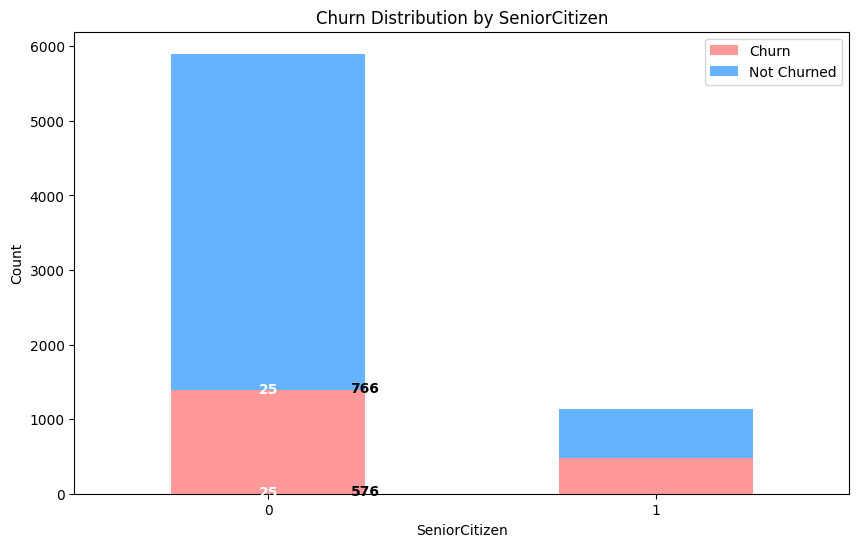

In [15]:
plot_stacked_bar('SeniorCitizen')

We can observe that the senior citizens are more likely to churn.

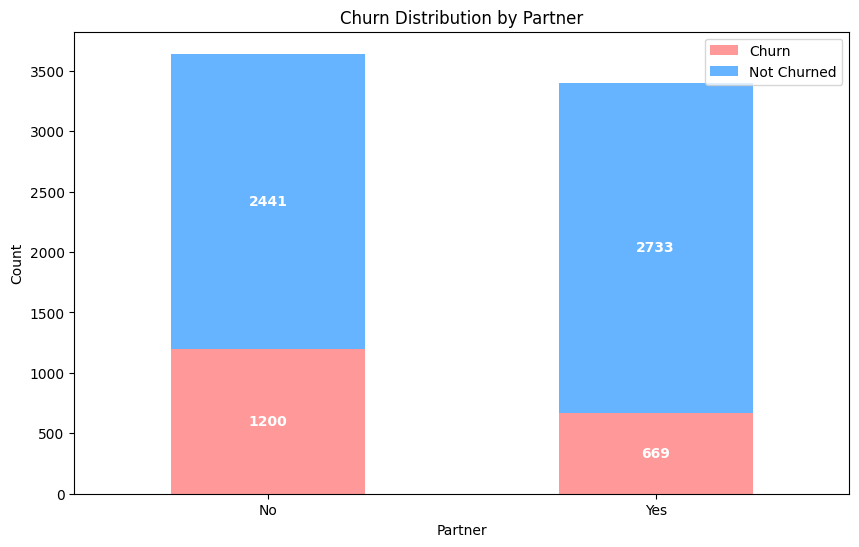

In [10]:
plot_stacked_bar('Partner')

The consumer without a partner is more likely to churn

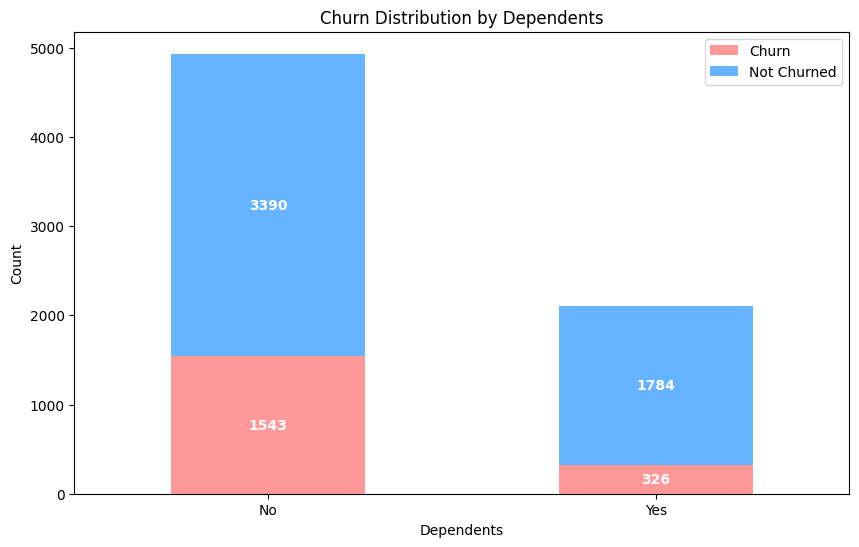

In [11]:
plot_stacked_bar('Dependents')

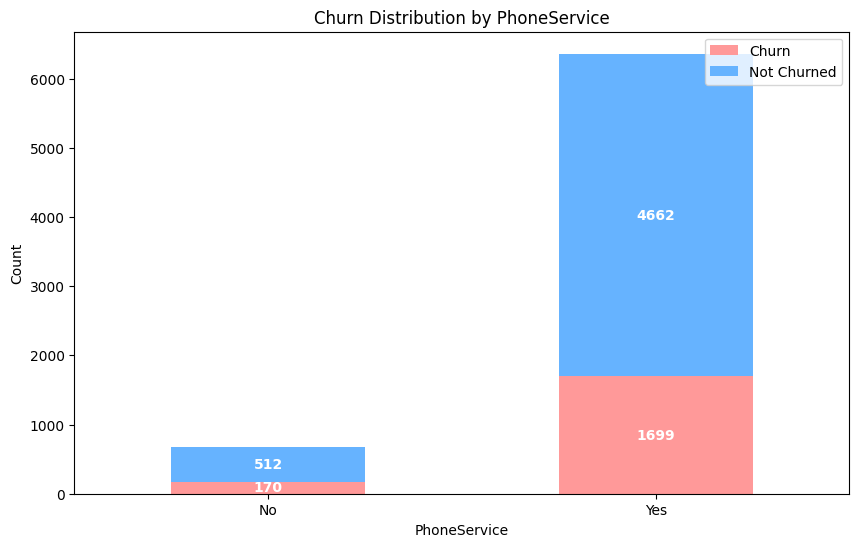

In [12]:
plot_stacked_bar('PhoneService')